In [1]:
from food_dataset import FoodDataset
from food_model import FoodModel
from train_settings import TrainSettings
from training_loop import TrainingLoop
import constants
from matplotlib import pyplot as plt
from train_logic import TrainLogic, TrainLogicImplementation, MockTrainLogic

In [2]:
path=constants.dataset_root

dt_train = FoodDataset(path,
                       constants.min_class_names,
                       constants.min_class_labels,
                       0,
                       100,
                       constants.transform)

dt_val = FoodDataset(path,
                     constants.min_class_names,
                     constants.min_class_labels,
                     800,
                     100,
                     constants.transform)

dt_test = FoodDataset(path,
                      constants.min_class_names,
                      constants.min_class_labels,
                      900,
                      100,
                      constants.transform)

In [3]:
model = FoodModel(10)
sum(p.numel() for p in model.parameters() if p.requires_grad)

68667402

In [4]:

settings = TrainSettings("trying_out",
                         model,
                         dt_train,
                         dt_val,
                         device="cpu",
                         lr=0.001,
                         epochs=20,
                         save_after_epoch=5,
                         eval_after_epoch=1,
                         save_path=constants.save_path,
                        # print_after_steps=1,
                         print_memory=True,
                         batch_size=30)

training = TrainingLoop(settings, MockTrainLogic(len(settings.train_data), settings.batch_size, delay=0.0, overfit=10 ))

training.train()

Training trying_out for 20 epochs
Training on cpu
[21:59:03] Epoch 1/20, Ellapsed 00:07 seconds, Train Loss: 41.1821, Validation Loss: 20.3000 Evaluations: [] ETA: 02:27
[21:59:11] Epoch 2/20, Ellapsed 00:15 seconds, Train Loss: 6.8585, Validation Loss: 10.6000 Evaluations: [] ETA: 02:21
[21:59:19] Epoch 3/20, Ellapsed 00:23 seconds, Train Loss: 4.0302, Validation Loss: 7.5667 Evaluations: [] ETA: 02:13
[21:59:26] Epoch 4/20, Ellapsed 00:30 seconds, Train Loss: 2.8646, Validation Loss: 6.2000 Evaluations: [] ETA: 02:02
Model saved at /media/filestorage/code/projects/food101/trying_out_epoch_45.pth after epoch 5.
[21:59:36] Epoch 5/20, Ellapsed 00:40 seconds, Train Loss: 2.2241, Validation Loss: 5.5000 Evaluations: [] ETA: 02:01
[21:59:43] Epoch 6/20, Ellapsed 00:48 seconds, Train Loss: 1.8183, Validation Loss: 5.1333 Evaluations: [] ETA: 01:52
[21:59:51] Epoch 7/20, Ellapsed 00:55 seconds, Train Loss: 1.5380, Validation Loss: 4.9571 Evaluations: [] ETA: 01:42
[21:59:58] Epoch 8/20, Ell

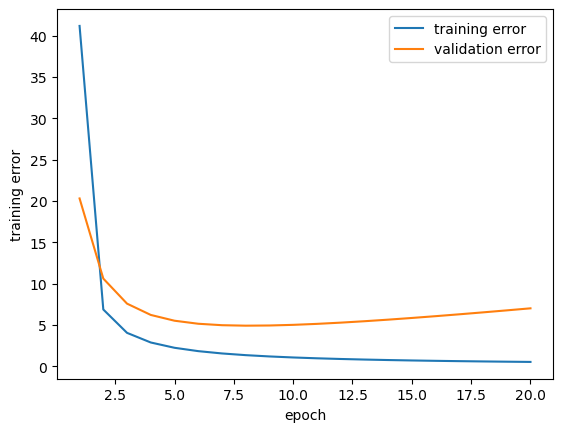

In [8]:
def plot_losses(train_loss, val_loss):
    assert len(train_loss) == len(val_loss), "Train loss length and val loss length should be equal"
    epochs = len(train_loss)+1
    fig = plt.figure()
    plt.legend("training and validation error")
    plt.xlabel("epoch")
    plt.ylabel("training error")
    plt.plot(range(1, epochs), train_loss, label="training error")
    plt.plot(range(1, epochs), val_loss, label="validation error")
    plt.legend()
    plt.show()

plot_losses(training.tr_losses, training.val_losses)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.622571].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0665298..2.64].


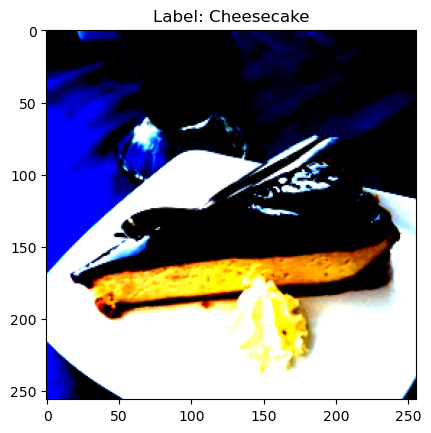

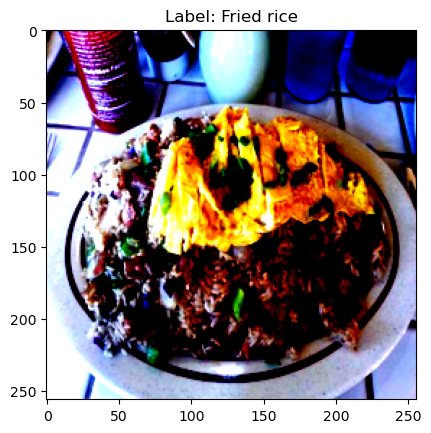

In [5]:
def show_image(image, label):
    plt.figure()
    plt.imshow(image.permute(1, 2, 0))
    plt.title(f"Label: {label}")
    
show_image(dt_train[799][0],dt_train.get_class_label(dt_train[799][1]))
show_image(dt_val[0][0],dt_val.get_class_label(dt_val[0][1]))

In [6]:
import random
for i in range(10):
    idx = abs(random.gauss(100, .1))
    print(i,idx)

0 100.22384663453451
1 99.86644003433095
2 100.09587857218419
3 99.86455657699372
4 99.96365447537397
5 99.89113503253405
6 99.95376704033762
7 99.95907448436327
8 100.06334578057707
9 100.03605828635636
